In [1]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import pickle


In [2]:
#Extrating data from pkl file.

dataset = r"C:\Users\venka\Documents\WESAD\Data\WESAD\S2"
s2_path = dataset + '/S2.pkl'
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [3]:
print(s2_data)
print(type(s2_data))

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]), 'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]), 'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]), 'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]), 'Temp': array([[30.120758],
       [30.129517],
       [30.138214],
       ...,
       [31.459229],
       [31.484283],
       [31.456268]], dtype=float32), 'Resp': array([[-1.14898682],
       [-1.12457275],
       

In [4]:
print(s2_data.keys())
print("Signal: ",s2_data['signal'].keys())
print("Chest: ",s2_data['signal']['chest'].keys())
print("wrist: ",s2_data['signal']['wrist'].keys())

dict_keys(['signal', 'label', 'subject'])
Signal:  dict_keys(['chest', 'wrist'])
Chest:  dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist:  dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])


In [5]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]
w_label=s2_data['label']

c_ax 4255300
c_ay 4255300
c_az 4255300
c_ecg 4255300
c_emg 4255300
c_eda 4255300
c_temp 4255300
c_resp 4255300
w_ax 194528
w_ay 194528
w_az 194528
w_bvp 389056
w_eda 24316
w_temp 24316
[0 0 0 ... 0 0 0] 4255300
Min label value 0 Max label value 7


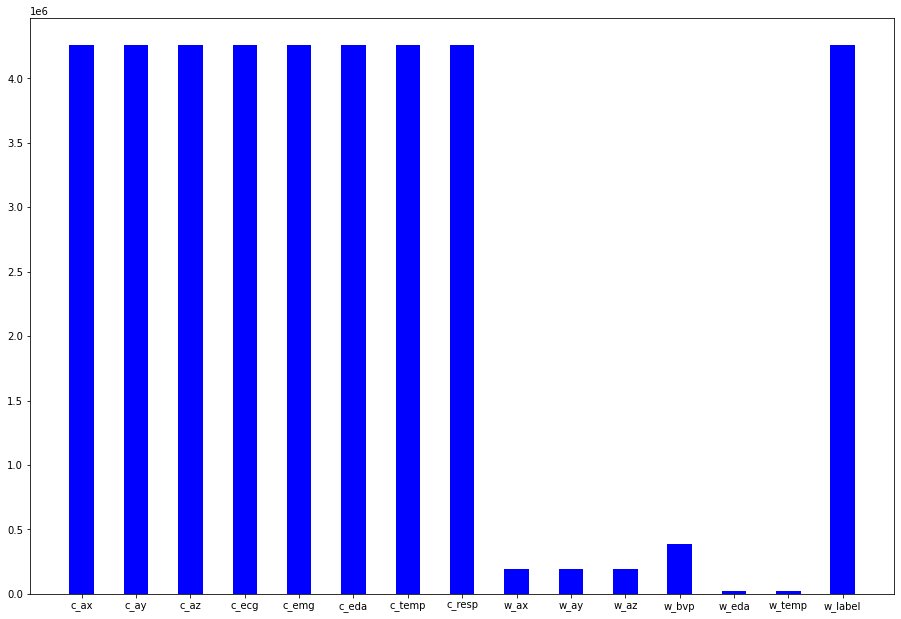

<Figure size 432x288 with 0 Axes>

In [6]:
%matplotlib inline
print("c_ax",len(c_ax))
print("c_ay",len(c_ay))
print("c_az",len(c_az))
print("c_ecg",len(c_ecg))
print("c_emg",len(c_emg))
print("c_eda",len(c_eda))
print("c_temp",len(c_temp))
print("c_resp",len(c_resp))
print("w_ax",len(w_ax))
print("w_ay",len(w_ay))
print("w_az",len(w_az))
print("w_bvp",len(w_bvp))
print("w_eda",len(w_eda))
print("w_temp",len(w_temp))
print(w_label, len(w_label))
print("Min label value", min(w_label), "Max label value",max(w_label))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]
y_ax = [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)

plt.show()
plt.savefig('f2.png',dpi=100)

#### Since data samples from chest device are 21 times more than data samples of wrist device, thus data set is unbalanced, and data from wrsit sensor should be excluded. Chest device gives 4255300 samples

In [7]:
np_df=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
np_df=np_df.T
df = pd.DataFrame(data=np_df, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 
print(df.head())
df.shape

     c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp    c_resp  \
0  0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758 -1.148987   
1  0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517 -1.124573   
2  0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214 -1.152039   
3  0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517 -1.158142   
4  0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951 -1.161194   

   w_label  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


(4255300, 9)

Text(0.5, 1.0, 'Boxplot')

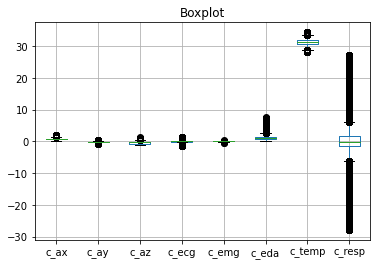

In [8]:
df.boxplot(column=['c_ax','c_ay','c_az','c_ecg','c_emg','c_eda','c_temp','c_resp'])
plt.title('Boxplot')

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
data = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


Text(0.5, 1.0, 'Boxplot')

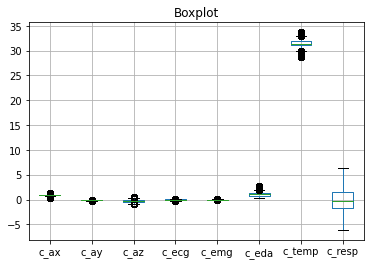

In [10]:
data.boxplot(column=['c_ax','c_ay','c_az','c_ecg','c_emg','c_eda','c_temp','c_resp'])
plt.title('Boxplot')

In [11]:

corr_matrix=data.corr()
(corr_matrix)


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
c_ax,1.000000,-0.023870,0.890463,-0.009258,-0.001814,0.086628,0.121247,-0.018757,-0.509452
c_ay,-0.023870,1.000000,0.027892,0.004532,-0.001511,-0.023619,-0.063603,-0.016261,-0.228733
c_az,0.890463,0.027892,1.000000,-0.004805,-0.002277,-0.138557,0.236908,0.001604,-0.410491
c_ecg,-0.009258,0.004532,-0.004805,1.000000,-0.005601,-0.022128,0.014425,0.064024,0.003692
c_emg,-0.001814,-0.001511,-0.002277,-0.005601,1.000000,-0.005357,-0.003173,-0.000339,-0.006690
c_eda,0.086628,-0.023619,-0.138557,-0.022128,-0.005357,1.000000,-0.541162,-0.030029,-0.119094
c_temp,0.121247,-0.063603,0.236908,0.014425,-0.003173,-0.541162,1.000000,0.019251,0.172247
c_resp,-0.018757,-0.016261,0.001604,0.064024,-0.000339,-0.030029,0.019251,1.000000,-0.003661
w_label,-0.509452,-0.228733,-0.410491,0.003692,-0.006690,-0.119094,0.172247,-0.003661,1.000000


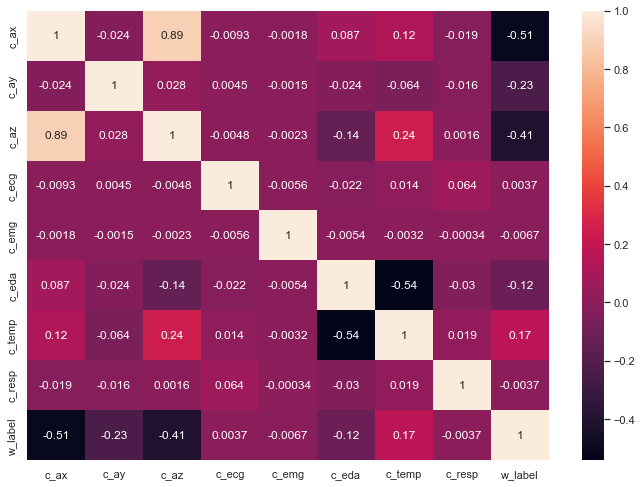

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(),annot=True);
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


In [42]:
data['w_label'].value_counts()

0.0    1230433
2.0     316935
4.0     260238
3.0     239191
1.0      53659
Name: w_label, dtype: int64

In [14]:
data.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,8.317685e-01,-1.233951e-01,-3.003224e-01,-1.787775e-02,-1.975948e-03,1.091733e+00,3.144793e+01,-2.909448e-02,1.164535e+00
std,1.124673e-01,2.816034e-02,2.486282e-01,8.312552e-02,8.932746e-03,4.379497e-01,5.746423e-01,2.247824e+00,1.510026e+00
min,3.218000e-01,-2.308000e-01,-9.208000e-01,-2.364807e-01,-2.677917e-02,2.784729e-01,2.871490e+01,-6.132507e+00,0.000000e+00
25%,8.298000e-01,-1.418000e-01,-4.118000e-01,-6.573486e-02,-7.736206e-03,7.759094e-01,3.109299e+01,-1.637268e+00,0.000000e+00
50%,8.786000e-01,-1.258000e-01,-2.696000e-01,2.655029e-03,-1.419067e-03,1.082993e+00,3.136053e+01,-2.746582e-01,0.000000e+00
75%,9.018000e-01,-1.078000e-01,-1.558000e-01,3.240967e-02,3.936768e-03,1.254272e+00,3.186548e+01,1.618958e+00,2.000000e+00
max,1.298600e+00,-1.480001e-02,5.502000e-01,2.128601e-01,2.243042e-02,2.666855e+00,3.367465e+01,6.269836e+00,4.000000e+00


transient_indices 2142701
baseline_indices 800800
stress_indices 430500
amusement_indices 253400
meditation_indices 537599


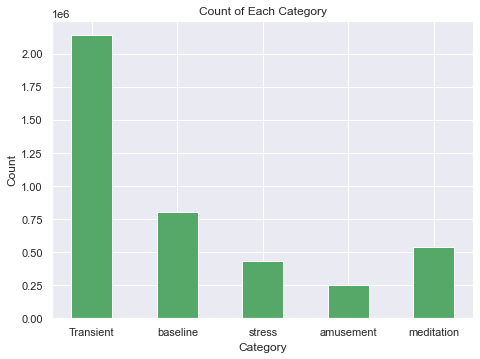

In [110]:
transient_indices = np.nonzero(s2_data['label']==0)[0]
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]
print("transient_indices", len(transient_indices))
print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))
fig = plt.figure()
ax = fig.add_axes([0.25,0.25,0.5,0.5])
langs = ["Transient","baseline", "stress", "amusement","meditation"]
y_ax = [len(transient_indices),len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices)]
ax.bar(langs,y_ax,color = 'g', width = 0.48)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Each Category")
# fig.savefig('f1.png')
plt.show()

array([[<AxesSubplot:title={'center':'c_ax'}>,
        <AxesSubplot:title={'center':'c_ay'}>,
        <AxesSubplot:title={'center':'c_az'}>],
       [<AxesSubplot:title={'center':'c_ecg'}>,
        <AxesSubplot:title={'center':'c_emg'}>,
        <AxesSubplot:title={'center':'c_eda'}>],
       [<AxesSubplot:title={'center':'c_temp'}>,
        <AxesSubplot:title={'center':'c_resp'}>,
        <AxesSubplot:title={'center':'w_label'}>]], dtype=object)

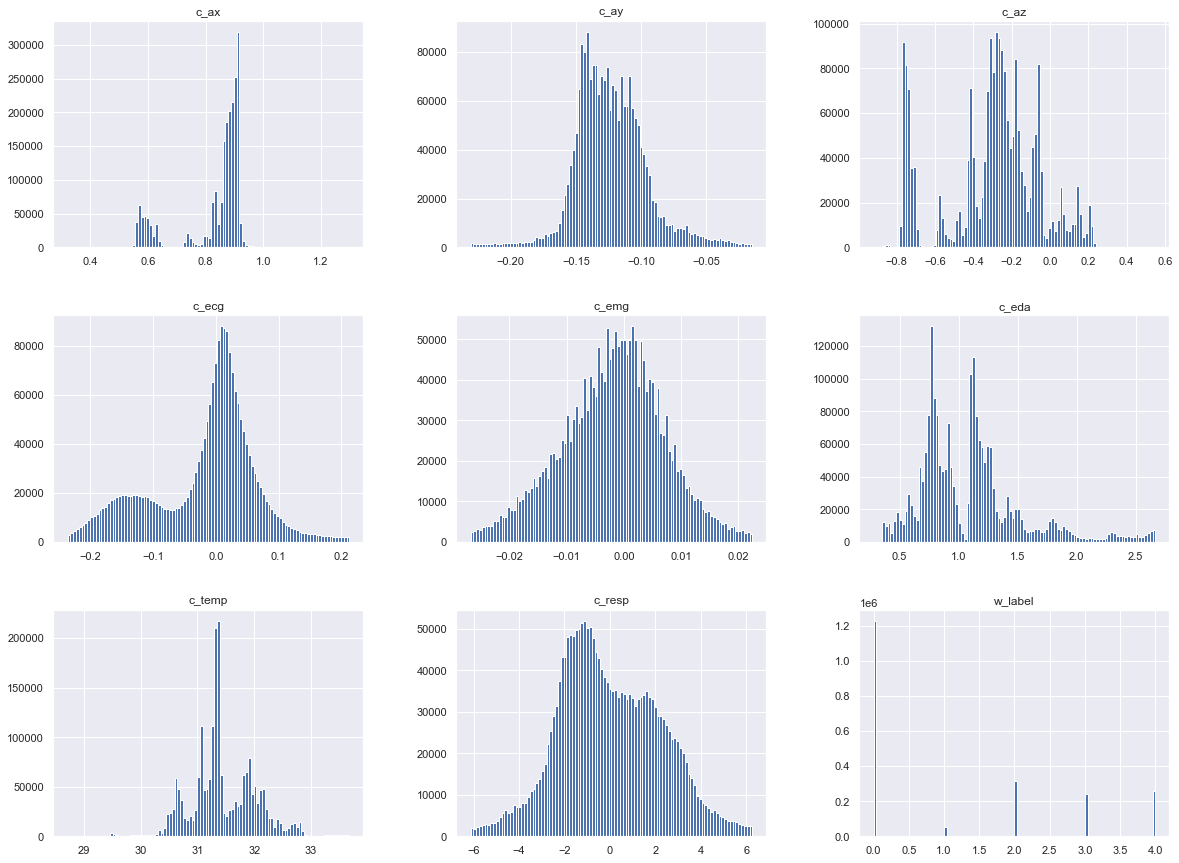

In [16]:
data.hist(bins=100, figsize = (20,15))

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

### Normalizing Data

In [19]:
from sklearn import preprocessing

x_norm_arr = preprocessing.normalize(X)

x_norm = pd.DataFrame(x_norm_arr)

x_norm.columns = X.columns


In [116]:
x_norm.head(10)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
0,0.022271,-0.002078,-0.024127,-0.001559,-0.000277,0.091867,0.994664,-0.033454
1,0.022159,-0.002206,-0.023833,-0.006118,-0.000503,0.091576,0.993039,0.066222
2,0.022120,-0.002083,-0.023932,0.001807,0.000334,0.092113,0.993525,-0.057907
3,0.021939,-0.002362,-0.024162,-0.004786,0.000000,0.091921,0.991491,0.086033
4,0.022015,-0.002156,-0.024013,0.001578,-0.000233,0.091208,0.992649,0.072525
5,0.022152,-0.002335,-0.024065,0.000449,0.000011,0.087174,0.995091,-0.033463
6,0.022305,-0.002287,-0.023885,0.000509,-0.000208,0.086793,0.995215,-0.030672
7,0.022267,-0.002265,-0.024102,0.001219,-0.000154,0.087069,0.994542,-0.047134
8,0.022188,-0.002281,-0.023963,0.001176,-0.000186,0.086718,0.995664,0.007721
9,0.022211,-0.002126,-0.024261,-0.007183,-0.000081,0.086327,0.994822,-0.041691


#### Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2)

In [21]:
print(x_train.shape)
print(x_test.shape)

(1680364, 8)
(420092, 8)


### Implementing PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_norm_pca = pca.fit_transform(x_norm)
print("original shape:   ", x_norm.shape)
print("transformed shape:", x_norm_pca.shape)

original shape:    (2100456, 8)
transformed shape: (2100456, 4)


In [23]:
pca_df = pd.DataFrame(data=x_norm_pca, columns=["PCA1", "PCA2", "PCA3","PCA4"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)

data frame combined w_label w_label
(2100456, 5)


In [24]:
exp_var_pca = pca.explained_variance_ratio_

In [25]:
print('Variance for PCA-1:',exp_var_pca[0])
print('Variance for PCA-2:',exp_var_pca[1])
print('Variance for PCA-3:',exp_var_pca[2])
print('Variance for PCA-4:',exp_var_pca[3])

Variance for PCA-1: 0.944268771218816
Variance for PCA-2: 0.038627364597985506
Variance for PCA-3: 0.013409294169775932
Variance for PCA-4: 0.0018904299362830878


### Spliting PCA data

In [26]:
pca_df.head(10)

,PCA1,PCA2,PCA3,PCA4,w_label
0,-0.032841,0.058042,-0.009928,-0.001176,1.0
1,0.066830,0.058455,-0.009523,-0.000282,1.0
2,-0.057281,0.058173,-0.009702,0.000191,1.0
3,0.086649,0.059046,-0.009734,0.001208,1.0
4,0.073156,0.058139,-0.009756,0.000429,1.0


In [27]:
pca_df.describe()

,PCA1,PCA2,PCA3,PCA4,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,7.065374e-17,-2.062654e-16,-4.075992e-17,-2.343078e-16,1.164535e+00
std,7.101781e-02,1.436372e-02,8.462962e-03,3.177604e-03,1.510026e+00
min,-2.018422e-01,-2.582857e-02,-2.362732e-02,-4.852091e-03,0.000000e+00
25%,-5.090451e-02,-1.049213e-02,-3.003762e-03,-2.069573e-03,0.000000e+00
50%,-7.769728e-03,-1.785350e-04,2.295380e-03,-7.453579e-04,0.000000e+00
75%,5.232827e-02,5.353798e-03,5.233225e-03,6.972915e-04,2.000000e+00
max,2.080210e-01,5.904585e-02,3.006894e-02,1.919573e-02,4.000000e+00


In [28]:
pcax_train,pcax_test,pcay_train,pcay_test=train_test_split(pca_df.iloc[:,:-1],pca_df.iloc[:,-1:],test_size=0.2, random_state=12)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

c:\Users\venka\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix of training set
[[847202   1212  59205  58538  18704]
 [  3200  38807     88    229    528]
 [173610    143  79578    102      0]
 [105740      0      0  85369      0]
 [    85      1      0     17 208006]]


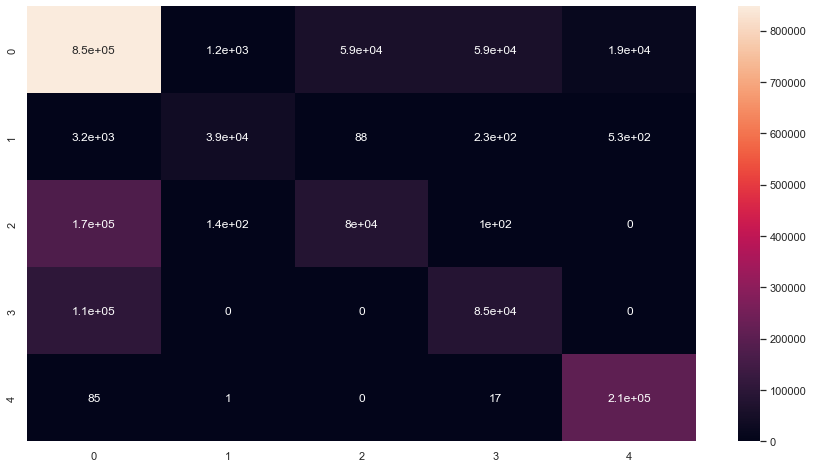

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.7485    0.8596    0.8002    245572
         1.0     0.9641    0.9065    0.9344     10807
         2.0     0.5751    0.3163    0.4081     63502
         3.0     0.5909    0.4434    0.5066     48082
         4.0     0.9159    0.9996    0.9559     52129

    accuracy                         0.7484    420092
   macro avg     0.7589    0.7051    0.7211    420092
weighted avg     0.7306    0.7484    0.7301    420092



In [30]:
log_model = LogisticRegression(solver='newton-cg',penalty='none')
log_model.fit(x_train, y_train)
log_cr=(classification_report(y_test, log_model.predict(x_test), digits=4))
log_cm = confusion_matrix(y_train, log_model.predict(x_train))
print('Confusion Matrix of training set')
print(log_cm)
plt.figure(figsize=(15,8))
sns.heatmap(log_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(log_cr)


In [65]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

f1_score_df = pd.DataFrame()
f1_score_df['Logistic Regression'] = f1_score(y_test, log_model.predict(x_test), average=None)

In [172]:

accuracy=[]
accuracy.append(accuracy_score(y_test, log_model.predict(x_test)))

Text(0.5, 1.0, 'F1 Score across all categories')

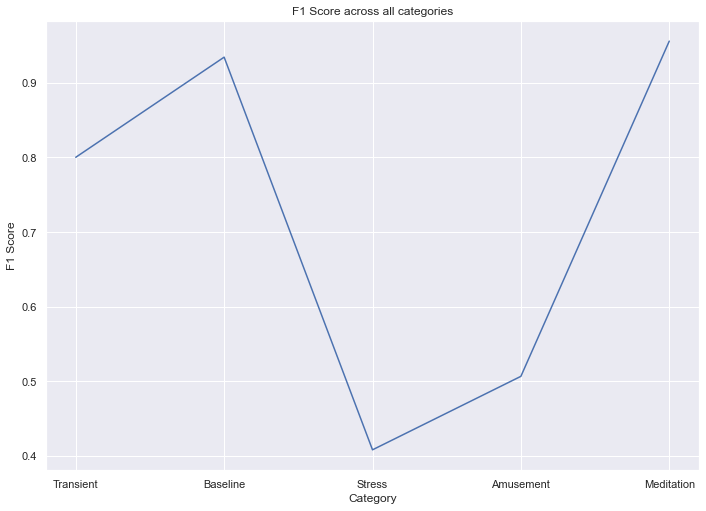

In [122]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Logistic Regression'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

In [119]:
f1_score_df['Logistic Regression']

0    0.800210
1    0.934427
2    0.408132
3    0.506625
4    0.955909
Name: Logistic Regression, dtype: float64

In [37]:

pred_prob = log_model.predict_proba(x_test)
pred_prob


array([[5.56455628e-01, 7.77815733e-08, 6.32308746e-02, 3.80313420e-01,
        1.05569552e-10],
       [5.76762204e-01, 1.07552093e-05, 4.19738463e-01, 3.48857726e-03,
        5.24393619e-10],
       [5.92188246e-01, 6.49200809e-07, 2.17028161e-01, 1.90782917e-01,
        2.70086458e-08],
       ...,
       [1.19114218e-01, 6.12497997e-03, 8.74756968e-01, 3.83383515e-06,
        1.66731550e-14],
       [6.25472861e-02, 1.53998282e-02, 2.46734373e-04, 2.36026093e-04,
        9.21570125e-01],
       [8.36762149e-01, 6.61997829e-05, 1.40027921e-01, 2.31400287e-02,
        3.70134187e-06]])

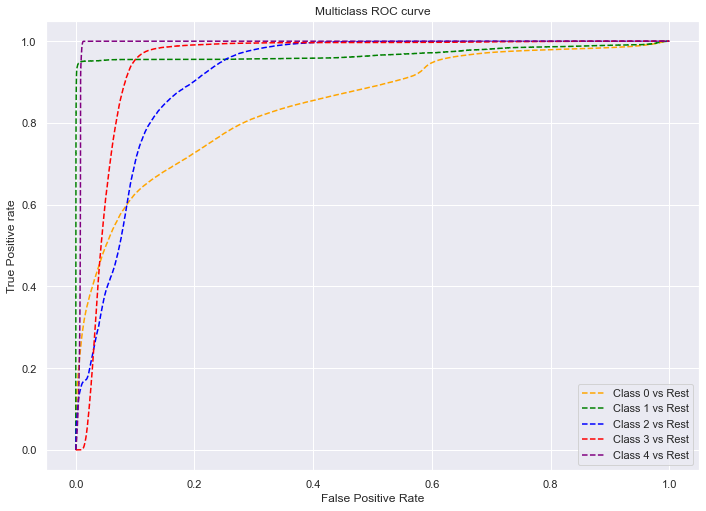

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

### Logistic Regression on PCA

c:\Users\venka\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.6823    0.8673    0.7637    245683
         1.0     0.9249    0.5277    0.6720     10694
         2.0     0.5413    0.2712    0.3613     63532
         3.0     0.0001    0.0000    0.0000     47951
         4.0     0.9148    1.0000    0.9555     52232

    accuracy                         0.6860    420092
   macro avg     0.6127    0.5332    0.5505    420092
weighted avg     0.6182    0.6860    0.6372    420092



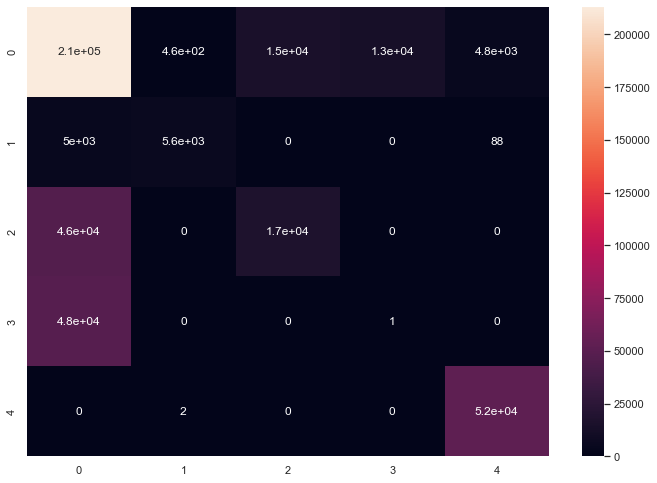

In [50]:
log_pca_model = LogisticRegression(solver='newton-cg',penalty='none')
log_pca_model.fit(pcax_train, pcay_train)
log_pca_predict = log_pca_model.predict(pcax_test)
cx = confusion_matrix(pcay_test, log_pca_predict)
sns.heatmap(cx, annot=True)
lg_pca=(classification_report(pcay_test, log_pca_predict, digits=4))
print('Classification Summary on Test data')
print(lg_pca)

In [173]:
f1_score_df['Logistic Regression (PCA-4)'] = f1_score(pcay_test, log_pca_model.predict(pcax_test), average=None)
accuracy.append(accuracy_score(pcay_test, log_pca_model.predict(pcax_test)))

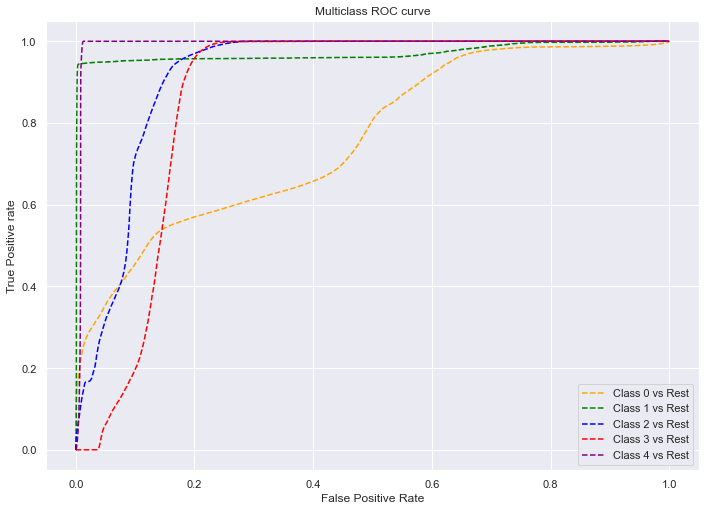

In [70]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = log_pca_model.predict_proba(pcax_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(pcay_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [48]:
pca2x_train = pcax_train.iloc[:,:-2]
pca2x_test = pcax_test.iloc[:,:-2]

Text(0.5, 1.0, 'F1 Score across all categories')

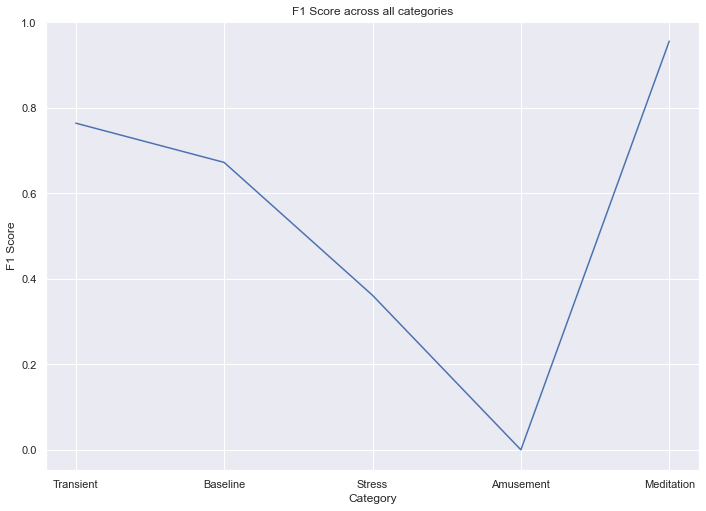

In [123]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Logistic Regression (PCA-4)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

### Logistic Regression on PCA = 2

c:\Users\venka\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\venka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\venka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\venka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.5763    0.8556    0.6887    245683
         1.0     0.0000    0.0000    0.0000     10694
         2.0     0.5224    0.2704    0.3563     63532
         3.0     0.1190    0.0558    0.0760     47951
         4.0     0.0000    0.0000    0.0000     52232

    accuracy                         0.5476    420092
   macro avg     0.2435    0.2364    0.2242    420092
weighted avg     0.4296    0.5476    0.4653    420092



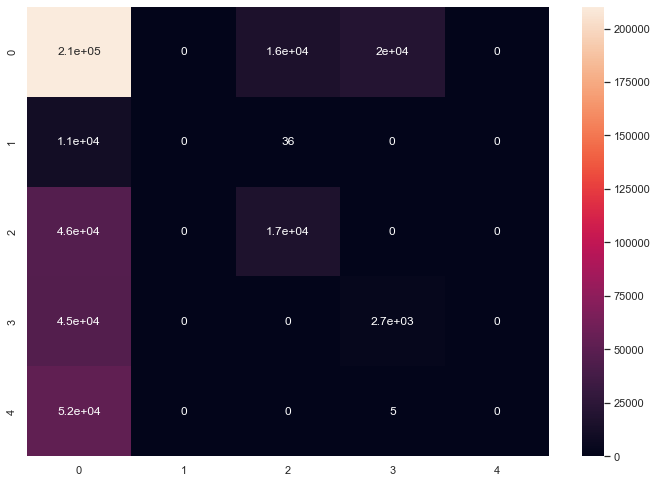

In [49]:
log_pca2_model = LogisticRegression(solver='newton-cg',penalty='none')
log_pca2_model.fit(pca2x_train, pcay_train)
log_pca2_predict = log_pca2_model.predict(pca2x_test)
cx = confusion_matrix(pcay_test, log_pca2_predict)
sns.heatmap(cx, annot=True)
lg_pca2=(classification_report(pcay_test, log_pca2_predict, digits=4))
print('Classification Summary on Test data')
print(lg_pca2)

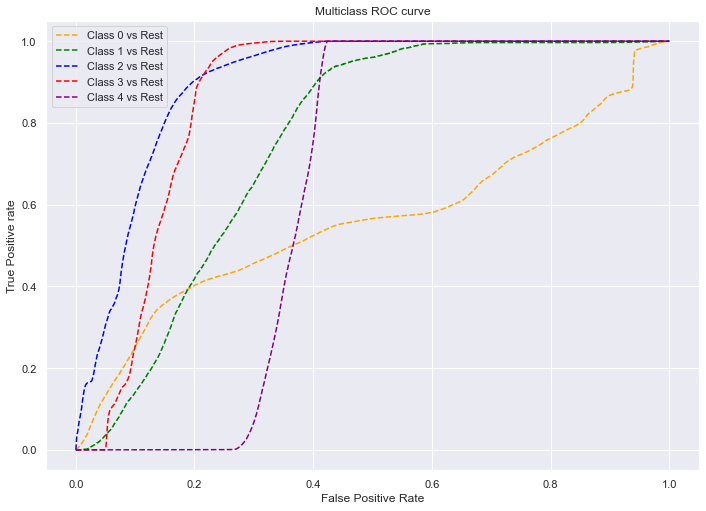

In [76]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = log_pca2_model.predict_proba(pca2x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(pcay_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [174]:
f1_score_df['Logistic Regression (PCA-2)'] = f1_score(pcay_test, log_pca2_model.predict(pca2x_test), average=None)
accuracy.append(accuracy_score(pcay_test, log_pca2_model.predict(pca2x_test)))

Text(0.5, 1.0, 'F1 Score across all categories')

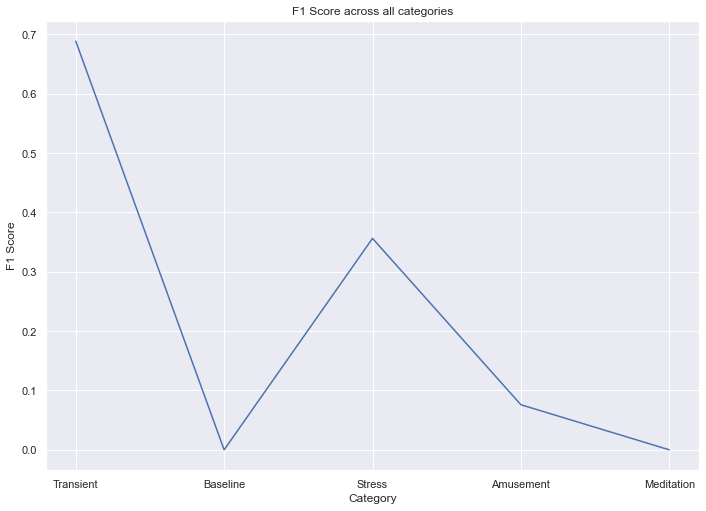

In [124]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Logistic Regression (PCA-2)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

### KNN with k = 3

In [77]:
from sklearn.neighbors import KNeighborsClassifier

c:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix of training set
[[973550     30   3162   2912   5207]
 [    78  42768      6      0      0]
 [  1753      0 251680      0      0]
 [   973      0      0 190136      0]
 [  1310      0      0      0 206799]]


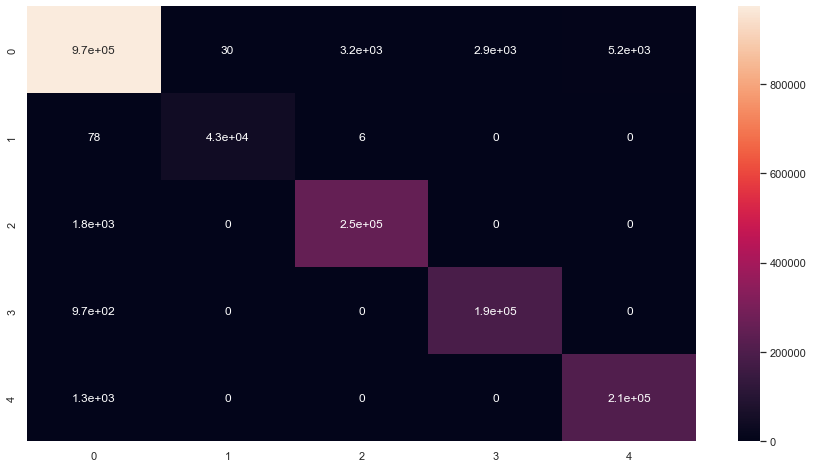

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9904    0.9786    0.9845    245572
         1.0     0.9986    0.9966    0.9976     10807
         2.0     0.9747    0.9853    0.9800     63502
         3.0     0.9691    0.9877    0.9783     48082
         4.0     0.9606    0.9853    0.9728     52129

    accuracy                         0.9819    420092
   macro avg     0.9787    0.9867    0.9826    420092
weighted avg     0.9821    0.9819    0.9820    420092



In [78]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
knn3_predict = knn3.predict(x_test)
knn3_cr=(classification_report(y_test, knn3.predict(x_test), digits=4))
knn3_cm = confusion_matrix(y_train, knn3.predict(x_train))
print('Confusion Matrix of training set')
print(knn3_cm)
plt.figure(figsize=(15,8))
sns.heatmap(knn3_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(knn3_cr)

In [80]:
knn3_predict.shape

(420092,)

In [140]:
error_rate = []
error_rate.append(np.mean(knn3_predict.reshape((420092, 1)) != y_test))

c:\Users\venka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


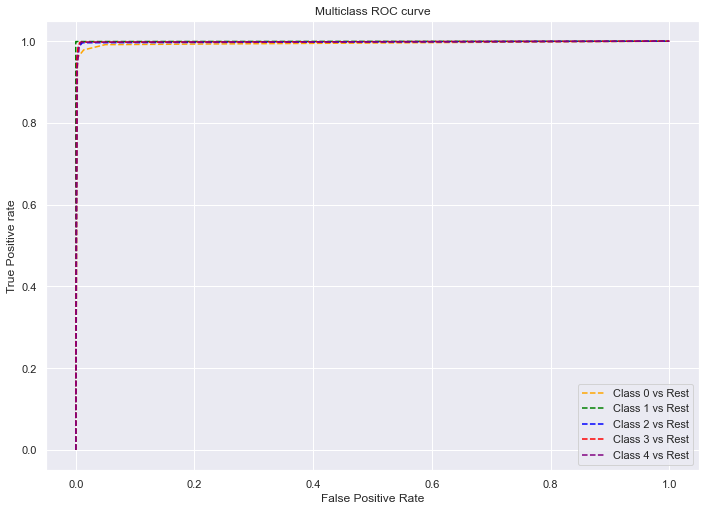

In [83]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = knn3.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [175]:
f1_score_df['KNN(K=3)'] = f1_score(y_test, knn3_predict, average=None)
accuracy.append(accuracy_score(y_test, knn3_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

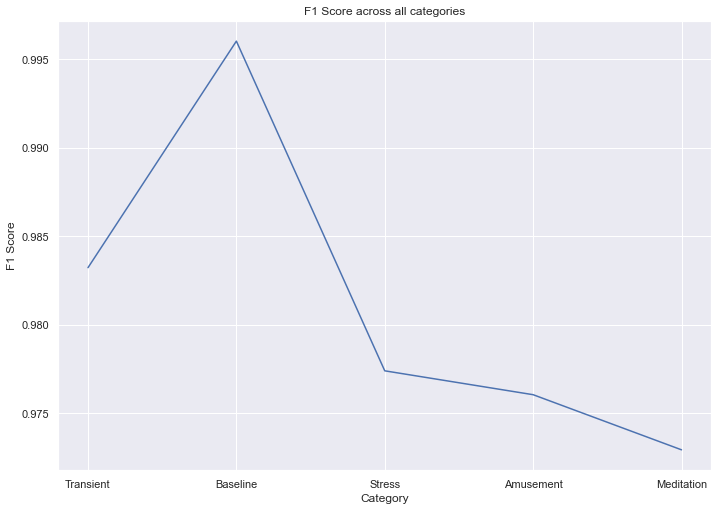

In [130]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=3)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

### KNN with k = 5

c:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix of training set
[[968428     34   4689   4623   7087]
 [   152  42693      7      0      0]
 [  2642      0 250791      0      0]
 [  1160      0      0 189949      0]
 [  1260      0      0      0 206849]]


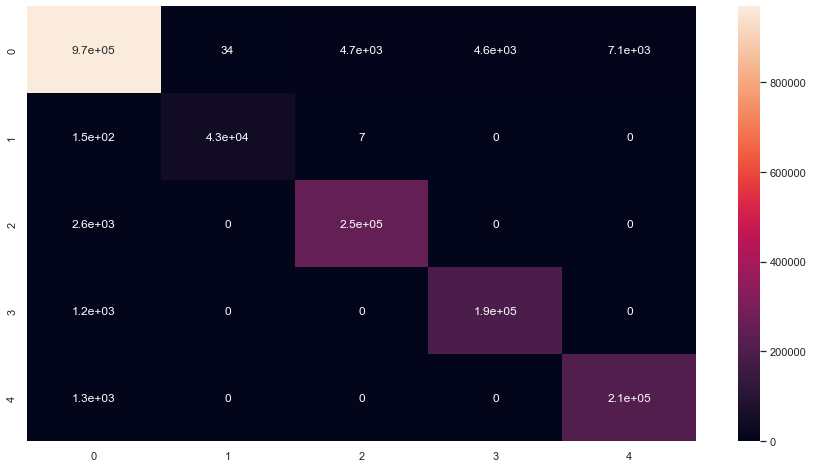

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9910    0.9756    0.9832    245572
         1.0     0.9982    0.9938    0.9960     10807
         2.0     0.9705    0.9844    0.9774     63502
         3.0     0.9638    0.9887    0.9761     48082
         4.0     0.9574    0.9890    0.9729     52129

    accuracy                         0.9805    420092
   macro avg     0.9762    0.9863    0.9811    420092
weighted avg     0.9808    0.9805    0.9806    420092



In [87]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)
knn5_predict = knn5.predict(x_test)
knn5_cr=(classification_report(y_test, knn5.predict(x_test), digits=4))
knn5_cm = confusion_matrix(y_train, knn5.predict(x_train))
print('Confusion Matrix of training set')
print(knn5_cm)
plt.figure(figsize=(15,8))
sns.heatmap(knn5_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(knn5_cr)

In [141]:
error_rate.append(np.mean(knn5_predict.reshape((420092, 1)) != y_test))

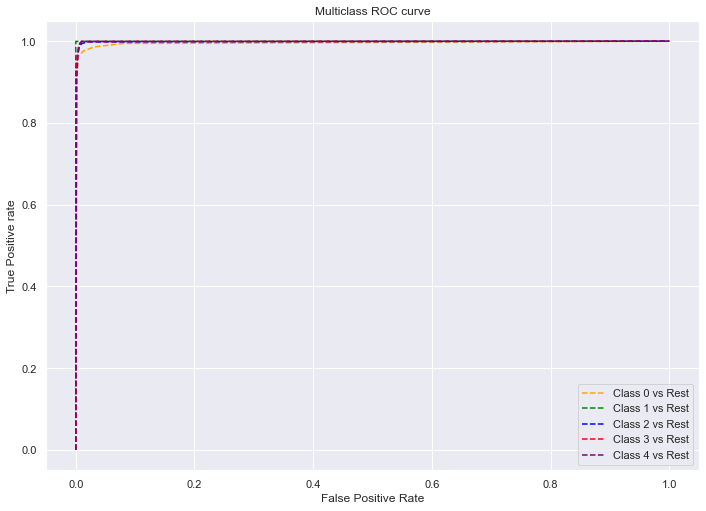

In [89]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = knn5.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [176]:
f1_score_df['KNN(K=5)'] = f1_score(y_test, knn5_predict, average=None)
accuracy.append(accuracy_score(y_test, knn5_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

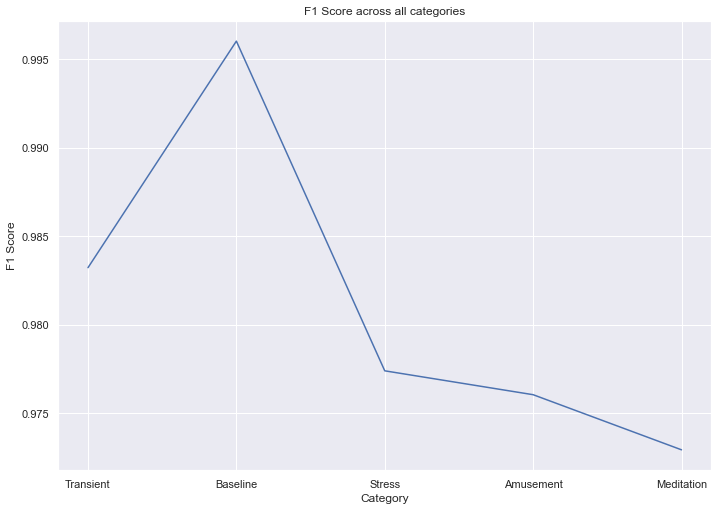

In [131]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=5)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

### KNN with k = 11

c:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix of training set
[[958576     89   8228   8051   9917]
 [   513  42324     15      0      0]
 [  4393      0 249040      0      0]
 [  1561      0      0 189548      0]
 [  1009      1      0      0 207099]]


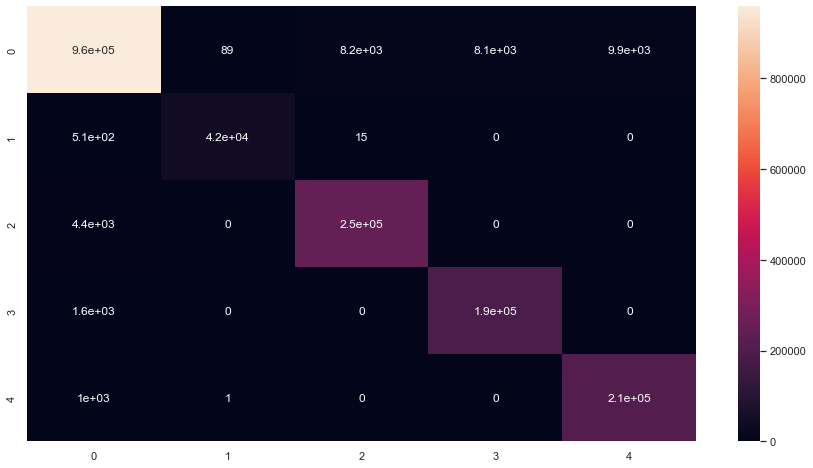

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9901    0.9686    0.9792    245572
         1.0     0.9969    0.9864    0.9916     10807
         2.0     0.9603    0.9784    0.9693     63502
         3.0     0.9515    0.9891    0.9699     48082
         4.0     0.9507    0.9934    0.9716     52129

    accuracy                         0.9760    420092
   macro avg     0.9699    0.9832    0.9763    420092
weighted avg     0.9764    0.9760    0.9760    420092



In [92]:
knn10 = KNeighborsClassifier(n_neighbors=11)
knn10.fit(x_train, y_train)
knn10_predict = knn10.predict(x_test)
knn10_cr=(classification_report(y_test, knn10.predict(x_test), digits=4))
knn10_cm = confusion_matrix(y_train, knn10.predict(x_train))
print('Confusion Matrix of training set')
print(knn10_cm)
plt.figure(figsize=(15,8))
sns.heatmap(knn10_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(knn10_cr)

In [142]:
error_rate.append(np.mean(knn10_predict.reshape((420092, 1)) != y_test))

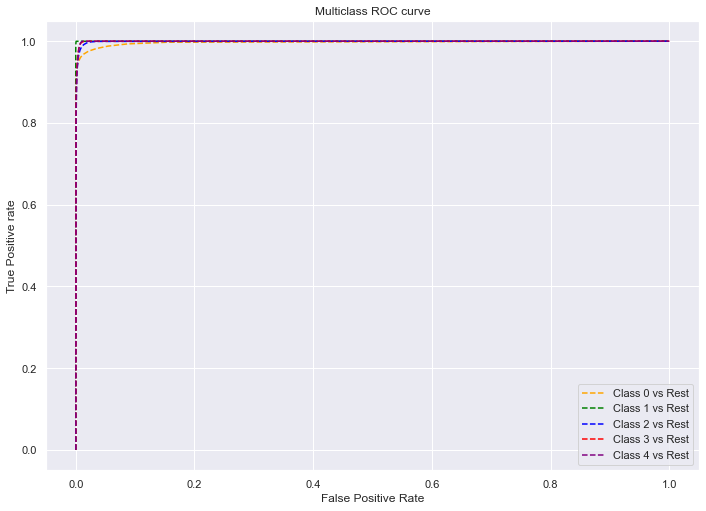

In [95]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = knn10.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [177]:
f1_score_df['KNN(K=11)'] = f1_score(y_test, knn10_predict, average=None)
accuracy.append(accuracy_score(y_test, knn10_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

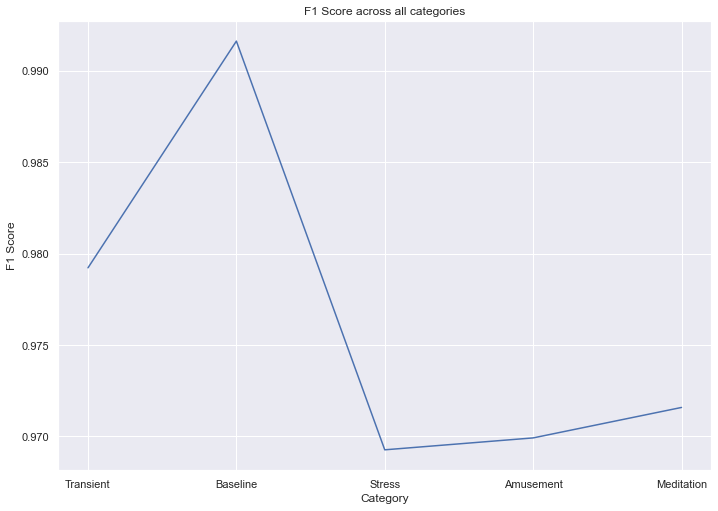

In [134]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=11)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

In [113]:
error_rate.append(np.mean(knn10_predict.reshape((420092, 1)) != y_test))

c:\Users\venka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### KNN with k = 21

c:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix of training set
[[948567    150  12732  11243  12169]
 [   819  42004     29      0      0]
 [  6829      0 246604      0      0]
 [  2156      0      0 188953      0]
 [   654      1      0      0 207454]]


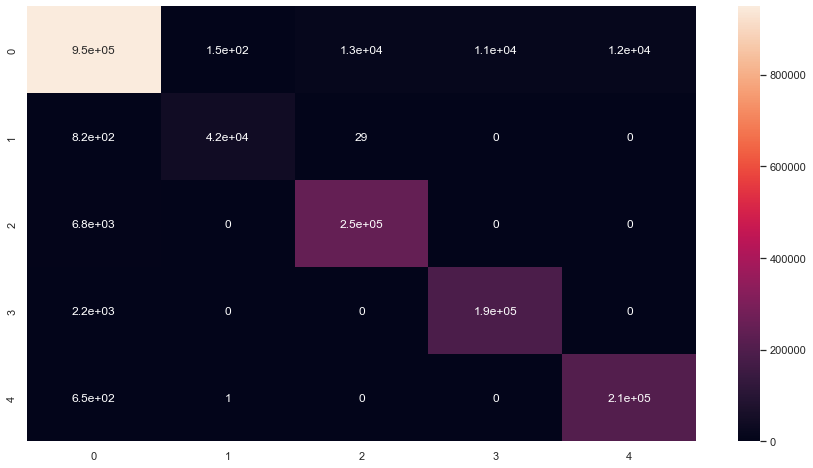

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9875    0.9600    0.9736    245572
         1.0     0.9955    0.9796    0.9875     10807
         2.0     0.9458    0.9691    0.9573     63502
         3.0     0.9385    0.9874    0.9623     48082
         4.0     0.9432    0.9962    0.9690     52129

    accuracy                         0.9695    420092
   macro avg     0.9621    0.9785    0.9699    420092
weighted avg     0.9703    0.9695    0.9696    420092



In [97]:
knn20 = KNeighborsClassifier(n_neighbors=21)
knn20.fit(x_train, y_train)
knn20_predict = knn20.predict(x_test)
knn20_cr=(classification_report(y_test, knn20.predict(x_test), digits=4))
knn20_cm = confusion_matrix(y_train, knn20.predict(x_train))
print('Confusion Matrix of training set')
print(knn20_cm)
plt.figure(figsize=(15,8))
sns.heatmap(knn20_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(knn20_cr)

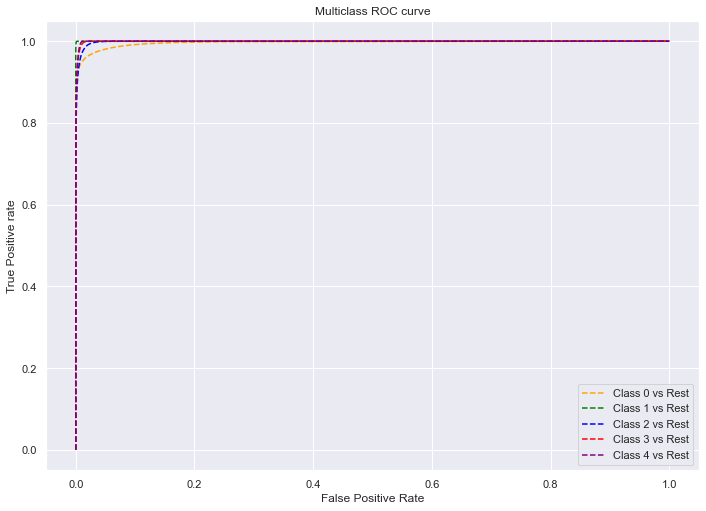

In [111]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = knn20.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [178]:
f1_score_df['KNN(K=21)'] = f1_score(y_test, knn20_predict, average=None)
accuracy.append(accuracy_score(y_test, knn20_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

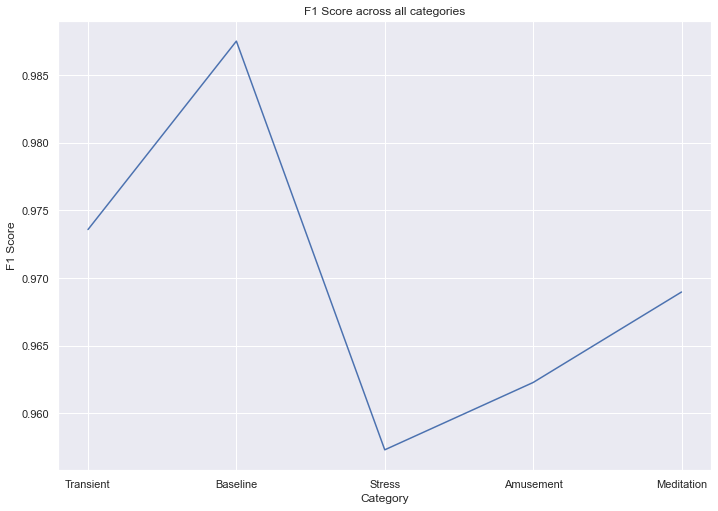

In [135]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=21)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

In [143]:
error_rate.append(np.mean(knn20_predict.reshape((420092, 1)) != y_test))

### KNN with k = 51

c:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix of training set
[[932301    218  21234  16163  14945]
 [  1523  41281     48      0      0]
 [ 11874      0 241559      0      0]
 [  3152      0      0 187957      0]
 [   447      4      0      0 207658]]


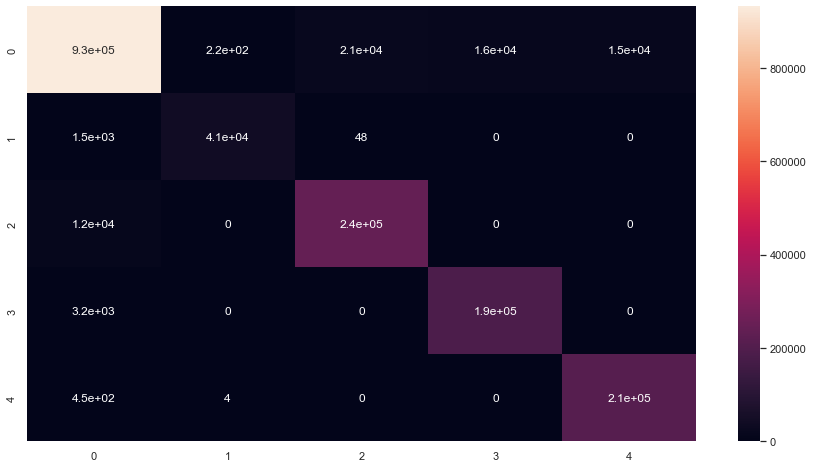

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9811    0.9448    0.9626    245572
         1.0     0.9948    0.9619    0.9781     10807
         2.0     0.9158    0.9508    0.9330     63502
         3.0     0.9177    0.9826    0.9490     48082
         4.0     0.9330    0.9980    0.9644     52129

    accuracy                         0.9571    420092
   macro avg     0.9485    0.9676    0.9574    420092
weighted avg     0.9584    0.9571    0.9572    420092



In [117]:
knn50 = KNeighborsClassifier(n_neighbors=51)
knn50.fit(x_train, y_train)
knn50_predict = knn50.predict(x_test)
knn50_cr=(classification_report(y_test, knn50.predict(x_test), digits=4))
knn50_cm = confusion_matrix(y_train, knn50.predict(x_train))
print('Confusion Matrix of training set')
print(knn50_cm)
plt.figure(figsize=(15,8))
sns.heatmap(knn50_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(knn50_cr)

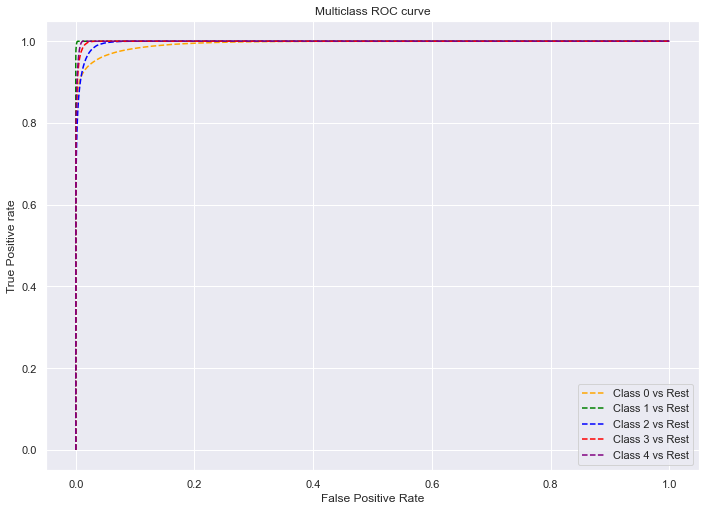

In [125]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = knn50.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [179]:
f1_score_df['KNN(K=51)'] = f1_score(y_test, knn50_predict, average=None)
accuracy.append(accuracy_score(y_test, knn50_predict))

In [144]:
error_rate.append(np.mean(knn50_predict.reshape((420092, 1)) != y_test))

Text(0.5, 1.0, 'F1 Score across all categories')

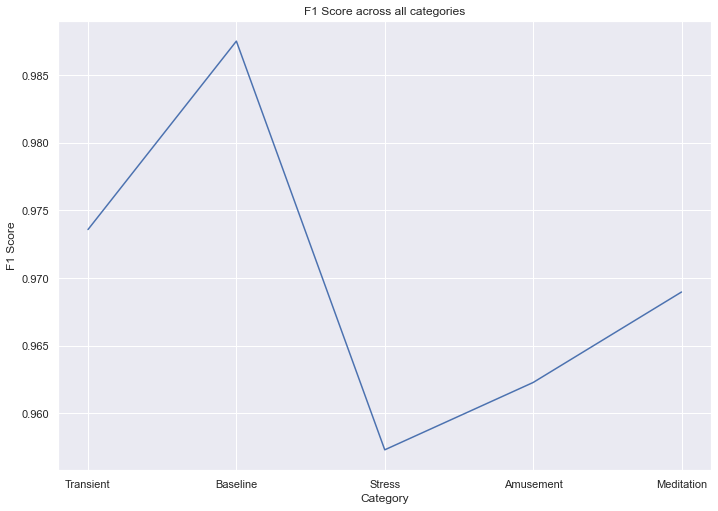

In [128]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=51)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

### KNN with k=101

c:\Users\venka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix of training set
[[932301    218  21234  16163  14945]
 [  1523  41281     48      0      0]
 [ 11874      0 241559      0      0]
 [  3152      0      0 187957      0]
 [   447      4      0      0 207658]]


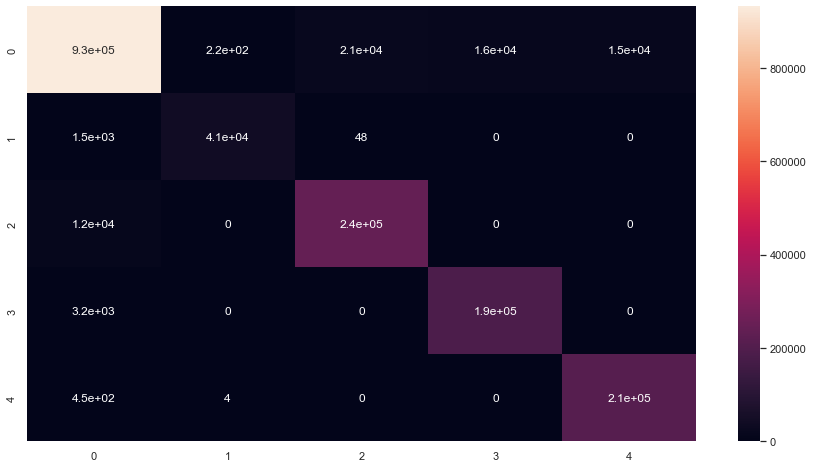

/n
Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9745    0.9309    0.9522    245572
         1.0     0.9910    0.9449    0.9674     10807
         2.0     0.8864    0.9327    0.9090     63502
         3.0     0.9007    0.9783    0.9379     48082
         4.0     0.9268    0.9985    0.9613     52129

    accuracy                         0.9454    420092
   macro avg     0.9359    0.9571    0.9456    420092
weighted avg     0.9473    0.9454    0.9456    420092



In [129]:
knn100 = KNeighborsClassifier(n_neighbors=101)
knn100.fit(x_train, y_train)
knn100_predict = knn100.predict(x_test)
knn100_cr=(classification_report(y_test, knn100.predict(x_test), digits=4))
knn100_cm = confusion_matrix(y_train, knn100.predict(x_train))
print('Confusion Matrix of training set')
print(knn100_cm)
plt.figure(figsize=(15,8))
sns.heatmap(knn100_cm, annot=True)
plt.show()
print('/n')
print('Classification Summary on Test data')
print(knn100_cr)

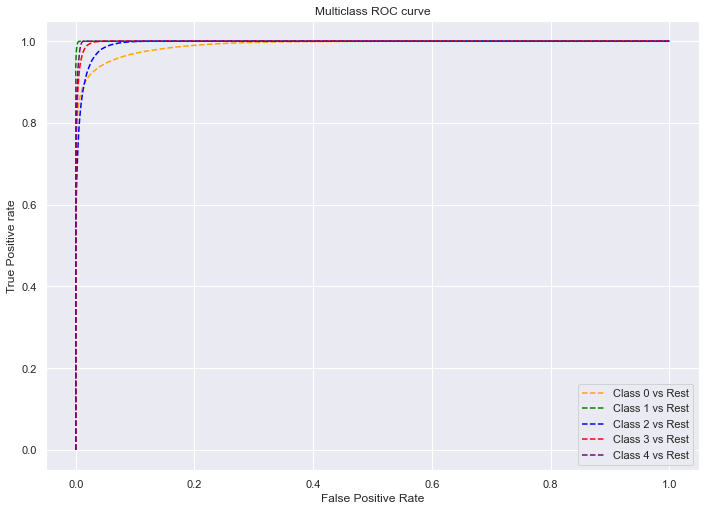

In [136]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = knn100.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [180]:
f1_score_df['KNN(K=101)'] = f1_score(y_test, knn100_predict, average=None)
accuracy.append(accuracy_score(y_test, knn100_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

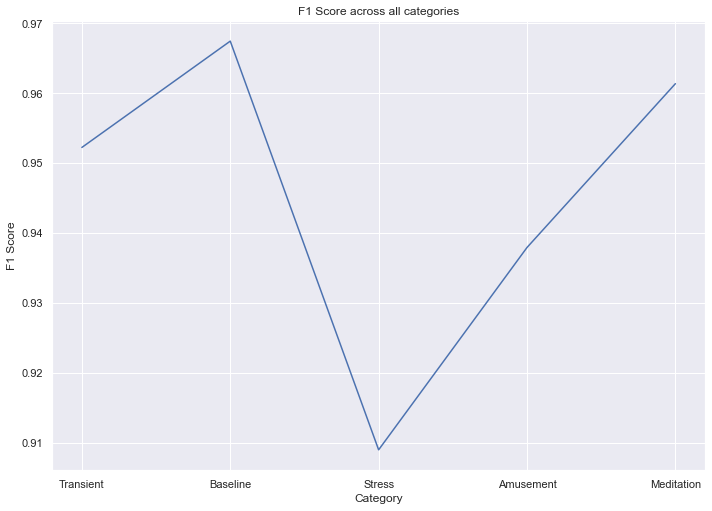

In [139]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=101)'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

In [145]:
error_rate.append(np.mean(knn100_predict.reshape((420092, 1)) != y_test))

In [146]:
x_train.shape

(1680364, 8)

Text(0, 0.5, 'Error Rate')

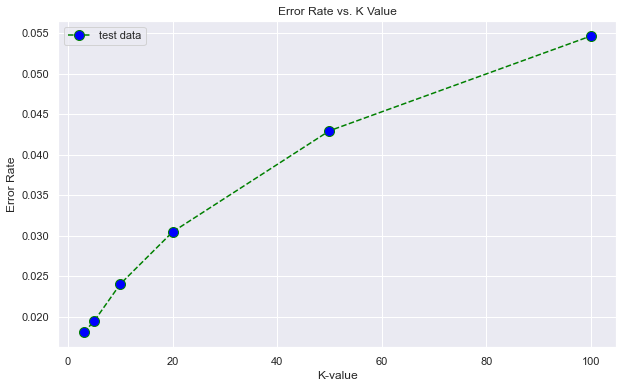

In [149]:
plt.figure(figsize=(10,6))
plt.plot([3,5,10,20,50, 100],error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10, label = 'test data')
plt.title('Error Rate vs. K Value')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Error Rate')

#### From the above graph we can see that error rate is optimal with k = 3 

### Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

rf_predict=rf.predict(x_test)

C:\Users\venka\AppData\Local\Temp\ipykernel_21876\599344780.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Confusion Matrix of training set
[[984861      0      0      0      0]
 [     0  42852      0      0      0]
 [     0      0 253433      0      0]
 [     0      0      0 191109      0]
 [     0      0      0      0 208109]]


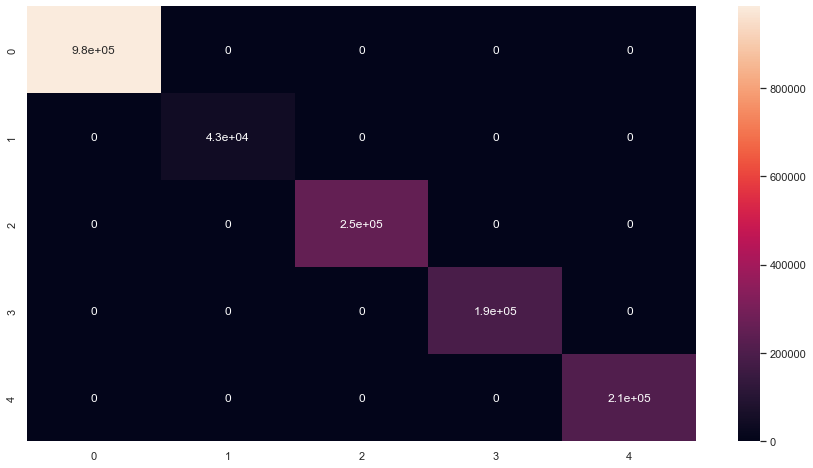



Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9943    0.9885    0.9914    245572
         1.0     1.0000    0.9929    0.9964     10807
         2.0     0.9858    0.9918    0.9888     63502
         3.0     0.9846    0.9938    0.9892     48082
         4.0     0.9777    0.9903    0.9840     52129

    accuracy                         0.9899    420092
   macro avg     0.9885    0.9914    0.9899    420092
weighted avg     0.9900    0.9899    0.9899    420092



In [151]:
rf_cr=(classification_report(y_test, rf_predict, digits=4))
rf_cm = confusion_matrix(y_train, rf.predict(x_train))
print('Confusion Matrix of training set')
print(rf_cm)
plt.figure(figsize=(15,8))
sns.heatmap(rf_cm, annot=True)
plt.show()
print('\n')
print('Classification Summary on Test data')
print(rf_cr)

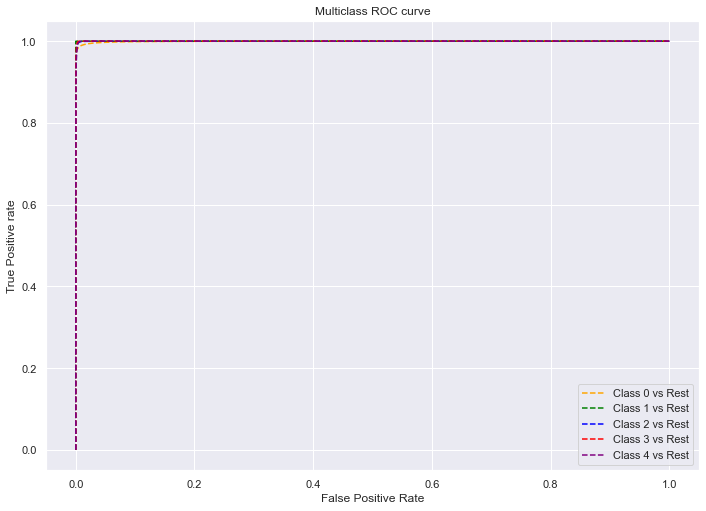

In [152]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = rf.predict_proba(x_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [181]:
f1_score_df['Random Forest'] = f1_score(y_test, rf_predict, average=None)
accuracy.append(accuracy_score(y_test, rf_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

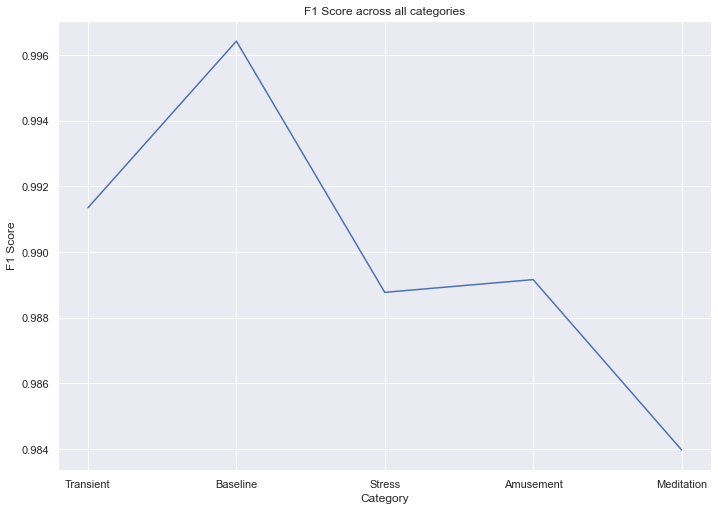

In [156]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Random Forest'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

### Random Forest on PCA

C:\Users\venka\AppData\Local\Temp\ipykernel_21876\676709064.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_pca.fit(pcax_train,pcay_train)


Confusion Matrix of training set
[[984743      0      2      4      1]
 [     0  42965      0      0      0]
 [     1      0 253402      0      0]
 [     1      0      0 191239      0]
 [     0      0      0      0 208006]]


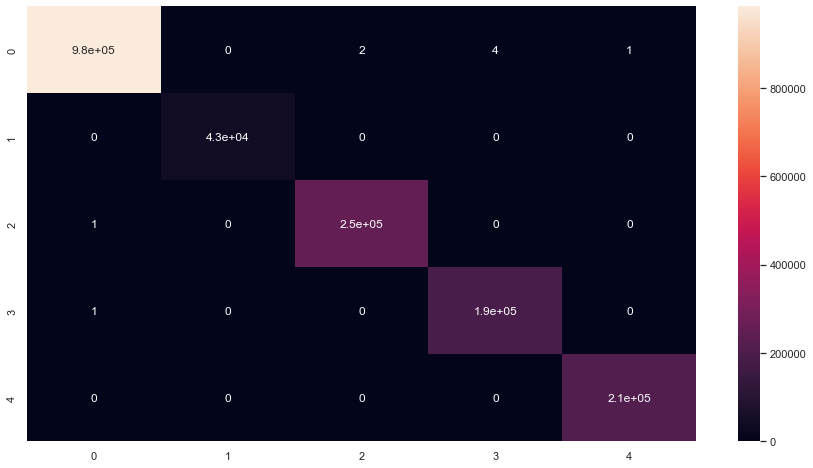



Classification Summary on Test data
              precision    recall  f1-score   support

         0.0     0.9765    0.9662    0.9713    245683
         1.0     0.9966    0.9865    0.9915     10694
         2.0     0.9350    0.9434    0.9392     63532
         3.0     0.9533    0.9761    0.9646     47951
         4.0     0.9661    0.9843    0.9751     52232

    accuracy                         0.9667    420092
   macro avg     0.9655    0.9713    0.9684    420092
weighted avg     0.9668    0.9667    0.9667    420092



In [158]:
rf_pca=RandomForestClassifier(n_estimators=100)
rf_pca.fit(pcax_train,pcay_train)

rf_pca_predict=rf_pca.predict(pcax_test)
rf_pca_cr=(classification_report(pcay_test, rf_pca_predict, digits=4))
rf_pca_cm = confusion_matrix(pcay_train, rf_pca.predict(pcax_train))
print('Confusion Matrix of training set')
print(rf_pca_cm)
plt.figure(figsize=(15,8))
sns.heatmap(rf_pca_cm, annot=True)
plt.show()
print('\n')
print('Classification Summary on Test data')
print(rf_pca_cr)

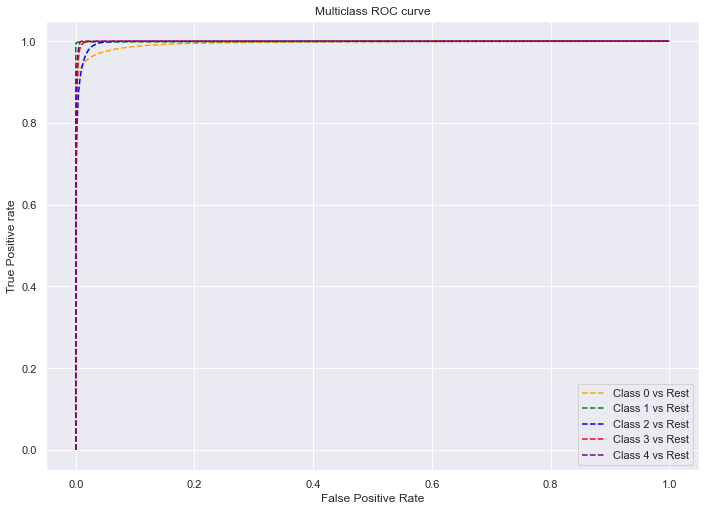

In [159]:
fpr = {}
tpr = {}
thresh ={}
pred_prob = rf_pca.predict_proba(pcax_test)
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(pcay_test, pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [182]:
f1_score_df['Random Forest on PCA'] = f1_score(y_test, rf_pca_predict, average=None)
accuracy.append(accuracy_score(pcay_test, rf_pca_predict))

Text(0.5, 1.0, 'F1 Score across all categories')

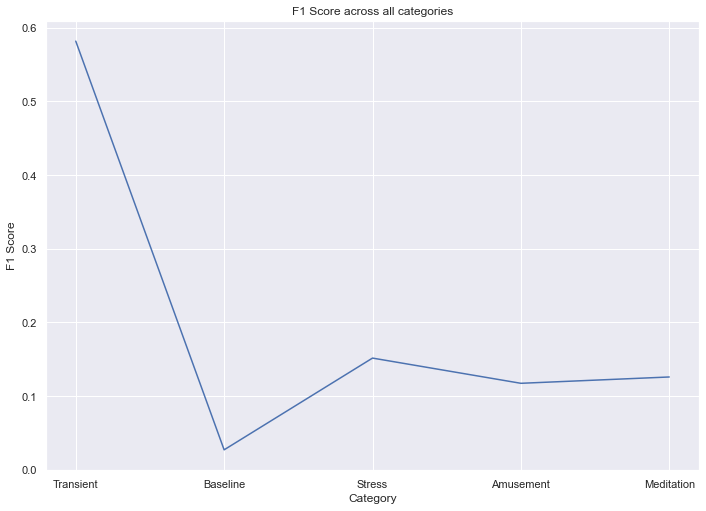

In [163]:
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Random Forest on PCA'])
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.title('F1 Score across all categories')

In [183]:
accsc = {'Logistic Regression':accuracy[0], 'Logistic Regression(PCA-4)':accuracy[1], 'Logistic Regression(PCA-2)':accuracy[2], 'KNN(k=3)':accuracy[3], 'KNN(k=5)':accuracy[4],'KNN(k=11)':accuracy[5],'KNN(k=21)':accuracy[6],'KNN(k=51)':accuracy[7],'KNN(k=101)':accuracy[8],'Random Forest':accuracy[9],'Random Forest on PCA':accuracy[10]}

In [185]:
acc=pd.DataFrame(accsc, index=[0])

In [189]:
acc['Random Forest on PCA'] = accuracy_score(pcay_test, rf_pca_predict)

In [197]:
acc.iloc[0].tolist()

[0.7484265351399217,
 0.6859902116679204,
 0.5476205212191615,
 0.981944431219828,
 0.9805423573883816,
 0.9759671690962932,
 0.9695352446606934,
 0.9570522647420089,
 0.9453524466069337,
 0.9899188749131143,
 0.9666620645001571]

Text(0.5, 1.0, 'Accuracy over all models')

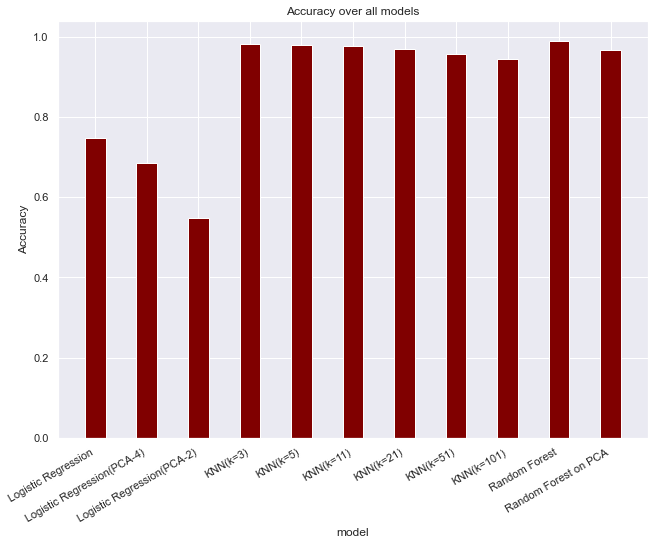

In [219]:

fig = plt.figure()
ax = fig.add_axes([0.7,0.7,0.7,0.7])
plt.bar(acc.columns, acc.iloc[0].tolist(), color ='maroon',width = 0.4)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.title('Accuracy over all models')

Text(0.5, 1.0, 'F1 Score across all categories')

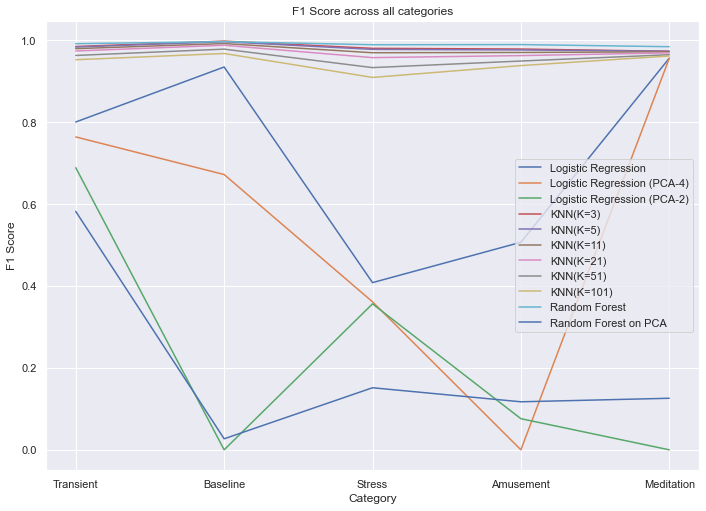

In [191]:

plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Logistic Regression'], label = 'Logistic Regression')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Logistic Regression (PCA-4)'],label = 'Logistic Regression (PCA-4)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Logistic Regression (PCA-2)'],label = 'Logistic Regression (PCA-2)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=3)'],label = 'KNN(K=3)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=5)'],label = 'KNN(K=5)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=11)'],label = 'KNN(K=11)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=21)'],label = 'KNN(K=21)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=51)'],label = 'KNN(K=51)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['KNN(K=101)'],label = 'KNN(K=101)')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Random Forest'],label = 'Random Forest')
plt.plot(['Transient','Baseline','Stress','Amusement','Meditation'], f1_score_df['Random Forest on PCA'],label = 'Random Forest on PCA')
plt.legend()
plt.xlabel('Category')
plt.ylabel('F1 Score')

plt.title('F1 Score across all categories')